In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_32_data_4.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_32_data_4.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-0.90965233  0.27064548 -0.04445391 -0.90649118  0.26990264 -0.0409652
  -0.90488287  0.27233149 -0.03712486 -0.9048223   0.27776076 -0.03444051
  -0.90542503  0.2848387  -0.03403024 -0.90549049  0.29175066 -0.03598224
  -0.90423704  0.29716067 -0.03950412 -0.90155666  0.30059259 -0.04355965
  -0.91822093  0.27154273 -0.04958113 -0.91365757  0.26936134 -0.04566913
  -0.91119762  0.2717112  -0.04071127 -0.91109969  0.27865617 -0.03728775
  -0.91183152  0.28784008 -0.03734279 -0.91135768  0.29613792 -0.04071516
  -0.90872156  0.30171258 -0.04574706 -0.90421765  0.30439565 -0.05078057
  -0.93039662  0.27395498 -0.05607436 -0.92362656  0.26909214 -0.05217368
  -0.9195755   0.27080072 -0.04558855 -0.91939636  0.28011407 -0.04102144
  -0.92017592  0.29250477 -0.04219268 -0.91827132  0.30221073 -0.04800913
  -0.91293941  0.30708172 -0.05496911 -0.90555755  0.30804543 -0.06068846
  -0.9488398   0.27977635 -0.06382377 -0.93883182  0.27000495 -0.06162218
  -0.93148948  

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(3072, 96) (3072, 7) training data size
(1024, 96) (1024, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(96,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()


Model: "Rectangular_4by4_sensor_concept_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense (Dense)                (None, 700)               67900     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4907      
Total params: 563,507
Trainable params: 563,507
Non-trainable params: 0
_________________________________________________________________


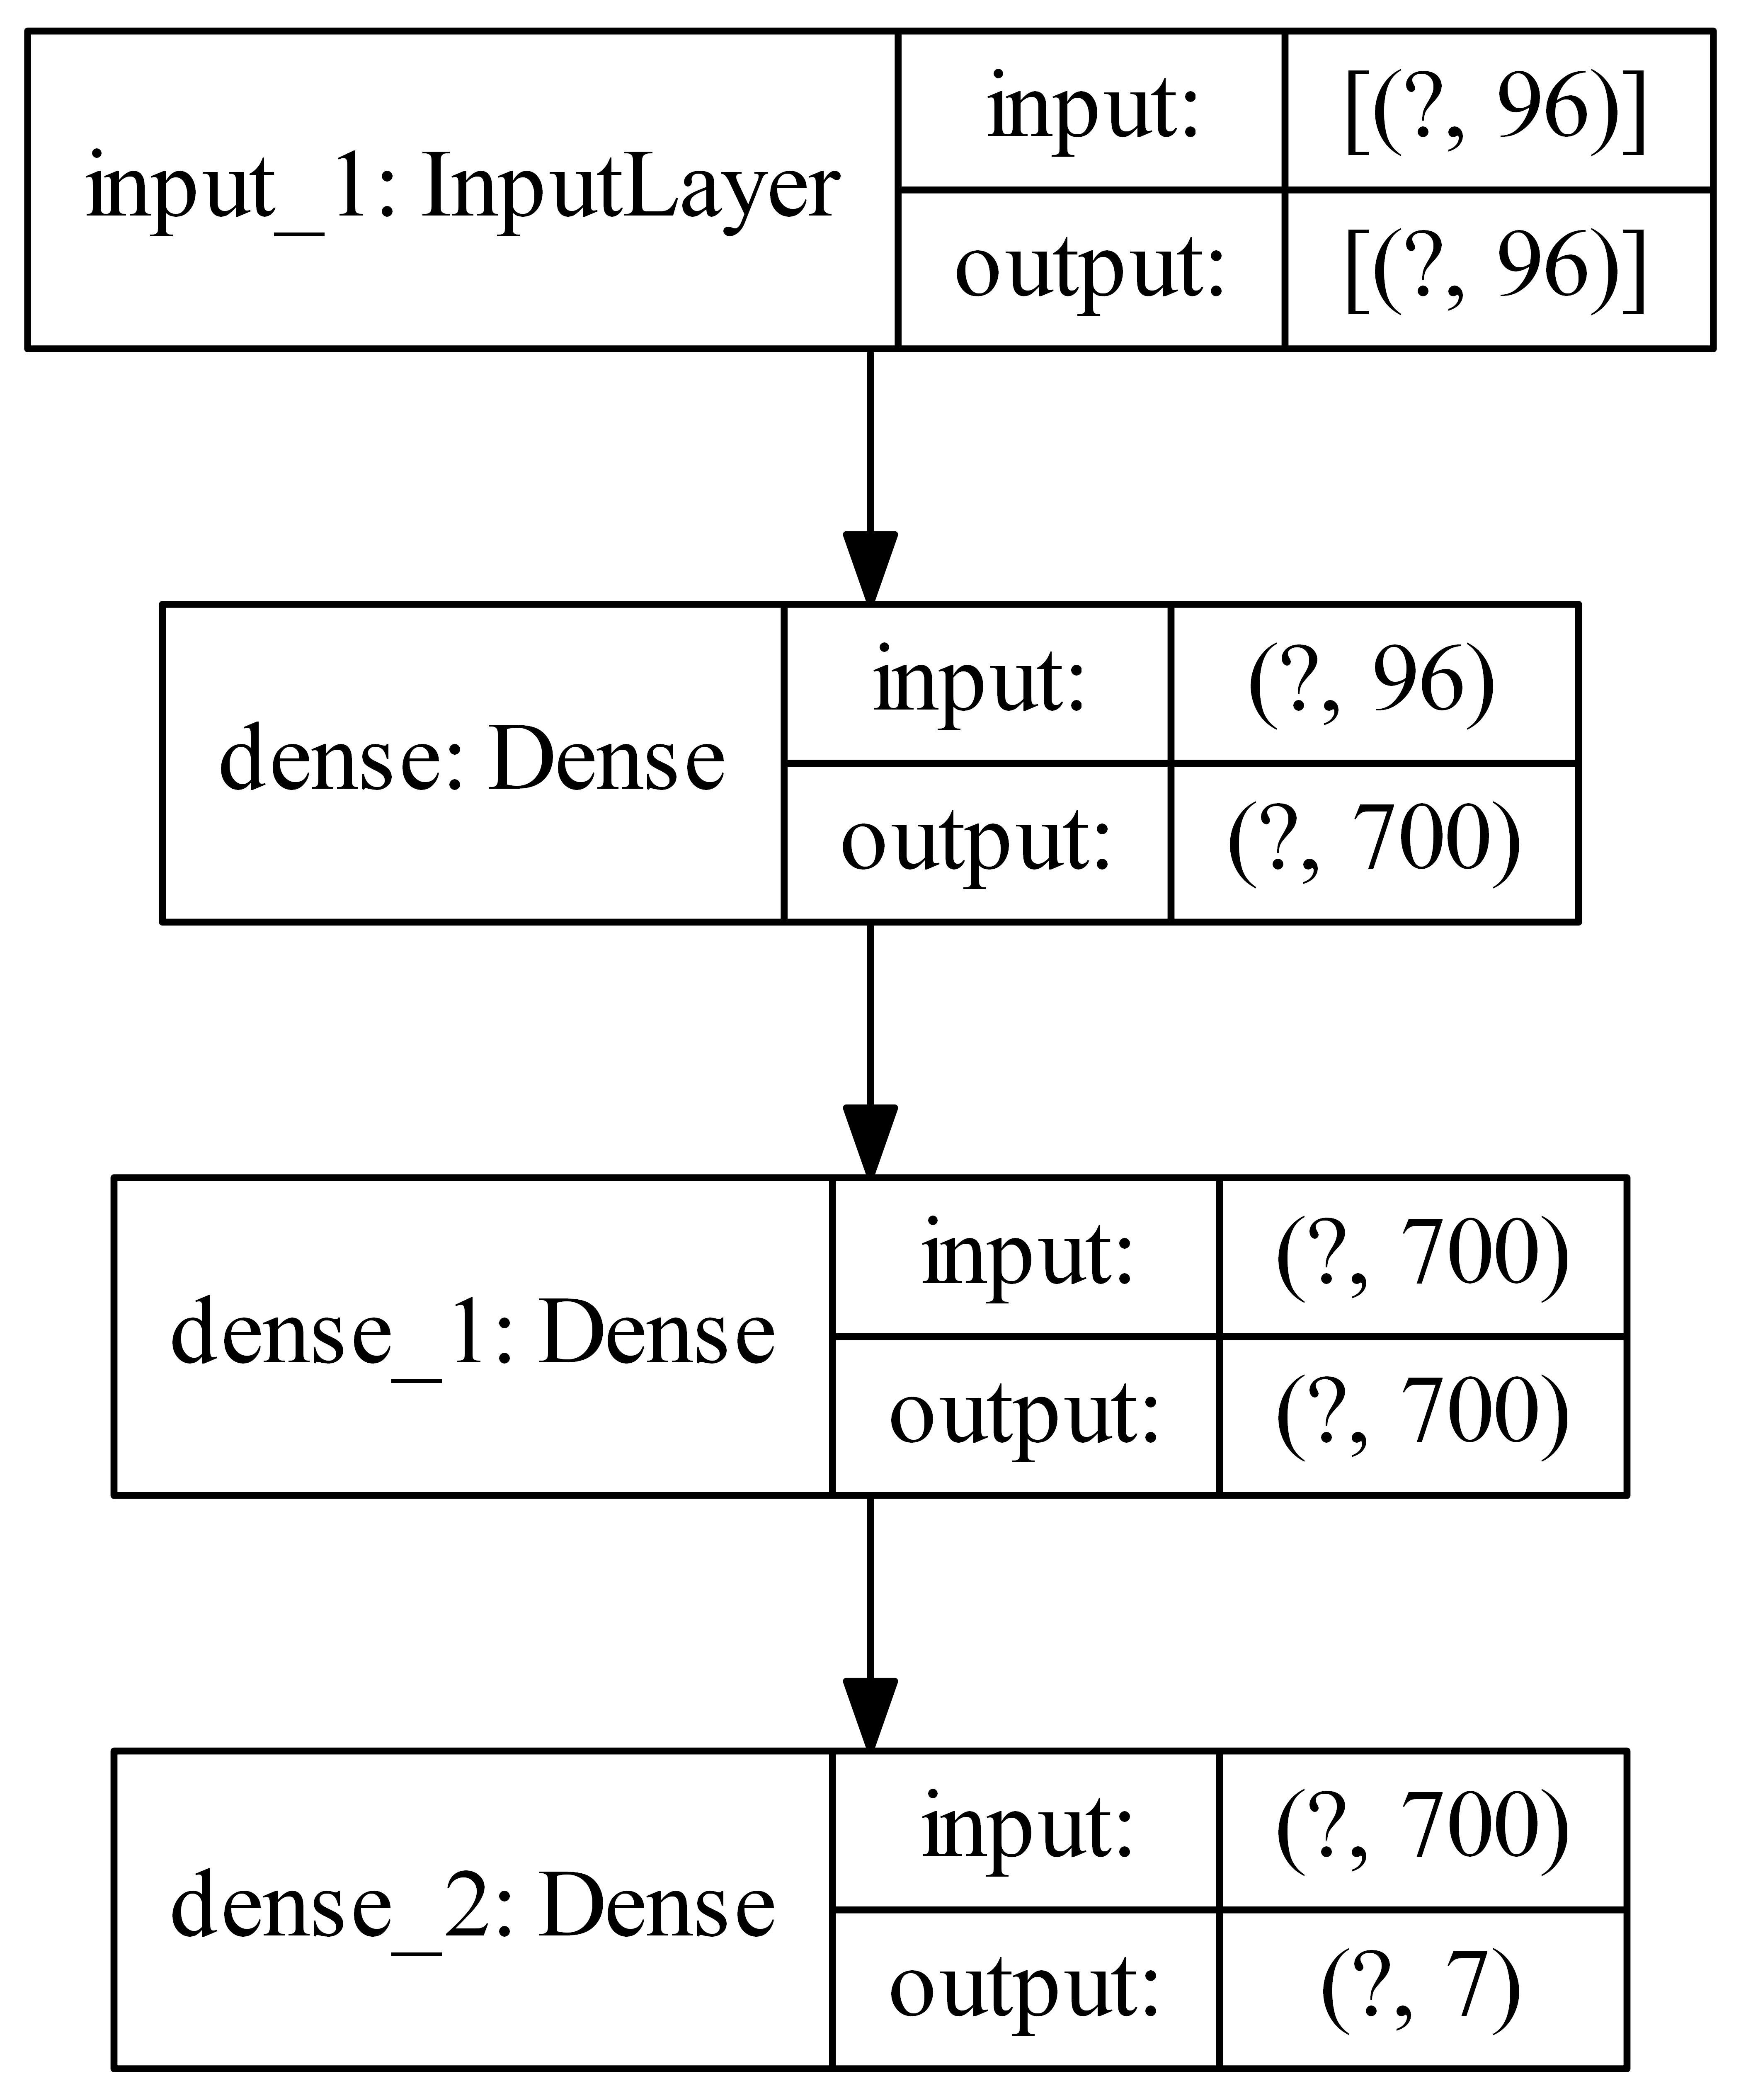

In [5]:
from keras.utils import plot_model
#keras.utils.plot_model(model)
plot_model(model, to_file='Model_Architecture_8by4.png', dpi=1200, show_shapes=True, show_layer_names=True)

In [6]:
history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
#history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, callbacks=my_callbacks, validation_data=(xval_scale,yval_scale))


Epoch 1/20
96/96 - 1s - loss: 0.2448 - val_loss: 0.2103
Epoch 2/20
96/96 - 0s - loss: 0.1922 - val_loss: 0.1908
Epoch 3/20
96/96 - 0s - loss: 0.1735 - val_loss: 0.1645
Epoch 4/20
96/96 - 0s - loss: 0.1593 - val_loss: 0.1651
Epoch 5/20
96/96 - 0s - loss: 0.1528 - val_loss: 0.1618
Epoch 6/20
96/96 - 0s - loss: 0.1426 - val_loss: 0.1447
Epoch 7/20
96/96 - 0s - loss: 0.1391 - val_loss: 0.1295
Epoch 8/20
96/96 - 0s - loss: 0.1331 - val_loss: 0.1323
Epoch 9/20
96/96 - 0s - loss: 0.1307 - val_loss: 0.1351
Epoch 10/20
96/96 - 0s - loss: 0.1255 - val_loss: 0.1336
Epoch 11/20
96/96 - 0s - loss: 0.1216 - val_loss: 0.1239
Epoch 12/20
96/96 - 0s - loss: 0.1158 - val_loss: 0.1221
Epoch 13/20
96/96 - 1s - loss: 0.1131 - val_loss: 0.1209
Epoch 14/20
96/96 - 1s - loss: 0.1133 - val_loss: 0.1202
Epoch 15/20
96/96 - 0s - loss: 0.1147 - val_loss: 0.1095
Epoch 16/20
96/96 - 0s - loss: 0.1096 - val_loss: 0.1195
Epoch 17/20
96/96 - 0s - loss: 0.1087 - val_loss: 0.1146
Epoch 18/20
96/96 - 0s - loss: 0.1064 - 

In [7]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_32_data_5.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_32_data_5.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(96,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))



read_x_data
read_y_data
[[-0.90965233  0.27064548 -0.04445391 -0.90649118  0.26990264 -0.0409652
  -0.90488287  0.27233149 -0.03712486 -0.9048223   0.27776076 -0.03444051
  -0.90542503  0.2848387  -0.03403024 -0.90549049  0.29175066 -0.03598224
  -0.90423704  0.29716067 -0.03950412 -0.90155666  0.30059259 -0.04355965
  -0.91822093  0.27154273 -0.04958113 -0.91365757  0.26936134 -0.04566913
  -0.91119762  0.2717112  -0.04071127 -0.91109969  0.27865617 -0.03728775
  -0.91183152  0.28784008 -0.03734279 -0.91135768  0.29613792 -0.04071516
  -0.90872156  0.30171258 -0.04574706 -0.90421765  0.30439565 -0.05078057
  -0.93039662  0.27395498 -0.05607436 -0.92362656  0.26909214 -0.05217368
  -0.9195755   0.27080072 -0.04558855 -0.91939636  0.28011407 -0.04102144
  -0.92017592  0.29250477 -0.04219268 -0.91827132  0.30221073 -0.04800913
  -0.91293941  0.30708172 -0.05496911 -0.90555755  0.30804543 -0.06068846
  -0.9488398   0.27977635 -0.06382377 -0.93883182  0.27000495 -0.06162218
  -0.93148948  

In [8]:
##for 6p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_32_data_6.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_32_data_6.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(96,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-0.90965233  0.27064548 -0.04445391 -0.90649118  0.26990264 -0.0409652
  -0.90488287  0.27233149 -0.03712486 -0.9048223   0.27776076 -0.03444051
  -0.90542503  0.2848387  -0.03403024 -0.90549049  0.29175066 -0.03598224
  -0.90423704  0.29716067 -0.03950412 -0.90155666  0.30059259 -0.04355965
  -0.91822093  0.27154273 -0.04958113 -0.91365757  0.26936134 -0.04566913
  -0.91119762  0.2717112  -0.04071127 -0.91109969  0.27865617 -0.03728775
  -0.91183152  0.28784008 -0.03734279 -0.91135768  0.29613792 -0.04071516
  -0.90872156  0.30171258 -0.04574706 -0.90421765  0.30439565 -0.05078057
  -0.93039662  0.27395498 -0.05607436 -0.92362656  0.26909214 -0.05217368
  -0.9195755   0.27080072 -0.04558855 -0.91939636  0.28011407 -0.04102144
  -0.92017592  0.29250477 -0.04219268 -0.91827132  0.30221073 -0.04800913
  -0.91293941  0.30708172 -0.05496911 -0.90555755  0.30804543 -0.06068846
  -0.9488398   0.27977635 -0.06382377 -0.93883182  0.27000495 -0.06162218
  -0.93148948  

In [9]:
##for 7p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_32_data_7.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_32_data_7.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(96,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-0.90965233  0.27064548 -0.04445391 -0.90649118  0.26990264 -0.0409652
  -0.90488287  0.27233149 -0.03712486 -0.9048223   0.27776076 -0.03444051
  -0.90542503  0.2848387  -0.03403024 -0.90549049  0.29175066 -0.03598224
  -0.90423704  0.29716067 -0.03950412 -0.90155666  0.30059259 -0.04355965
  -0.91822093  0.27154273 -0.04958113 -0.91365757  0.26936134 -0.04566913
  -0.91119762  0.2717112  -0.04071127 -0.91109969  0.27865617 -0.03728775
  -0.91183152  0.28784008 -0.03734279 -0.91135768  0.29613792 -0.04071516
  -0.90872156  0.30171258 -0.04574706 -0.90421765  0.30439565 -0.05078057
  -0.93039662  0.27395498 -0.05607436 -0.92362656  0.26909214 -0.05217368
  -0.9195755   0.27080072 -0.04558855 -0.91939636  0.28011407 -0.04102144
  -0.92017592  0.29250477 -0.04219268 -0.91827132  0.30221073 -0.04800913
  -0.91293941  0.30708172 -0.05496911 -0.90555755  0.30804543 -0.06068846
  -0.9488398   0.27977635 -0.06382377 -0.93883182  0.27000495 -0.06162218
  -0.93148948  

read_x_data
read_y_data
[[-0.90965233  0.27064548 -0.04445391 -0.90649118  0.26990264 -0.0409652
  -0.90488287  0.27233149 -0.03712486 -0.9048223   0.27776076 -0.03444051
  -0.90542503  0.2848387  -0.03403024 -0.90549049  0.29175066 -0.03598224
  -0.90423704  0.29716067 -0.03950412 -0.90155666  0.30059259 -0.04355965
  -0.91822093  0.27154273 -0.04958113 -0.91365757  0.26936134 -0.04566913
  -0.91119762  0.2717112  -0.04071127 -0.91109969  0.27865617 -0.03728775
  -0.91183152  0.28784008 -0.03734279 -0.91135768  0.29613792 -0.04071516
  -0.90872156  0.30171258 -0.04574706 -0.90421765  0.30439565 -0.05078057
  -0.93039662  0.27395498 -0.05607436 -0.92362656  0.26909214 -0.05217368
  -0.9195755   0.27080072 -0.04558855 -0.91939636  0.28011407 -0.04102144
  -0.92017592  0.29250477 -0.04219268 -0.91827132  0.30221073 -0.04800913
  -0.91293941  0.30708172 -0.05496911 -0.90555755  0.30804543 -0.06068846
  -0.9488398   0.27977635 -0.06382377 -0.93883182  0.27000495 -0.06162218
  -0.93148948  

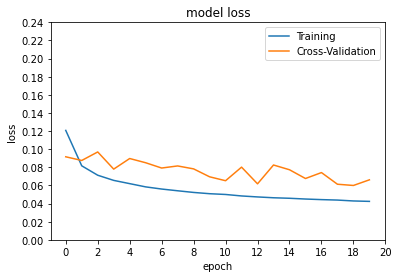

In [10]:
##for 8p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_32_data_8.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_32_data_8.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(96,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_5 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training ', 'Cross-Validation'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Model_Loss_8p_mae.png', dpi=1200)
plt.show()


In [11]:
##for 9p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_32_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_32_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(96,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_6 = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-0.90965233  0.27064548 -0.04445391 -0.90649118  0.26990264 -0.0409652
  -0.90488287  0.27233149 -0.03712486 -0.9048223   0.27776076 -0.03444051
  -0.90542503  0.2848387  -0.03403024 -0.90549049  0.29175066 -0.03598224
  -0.90423704  0.29716067 -0.03950412 -0.90155666  0.30059259 -0.04355965
  -0.91822093  0.27154273 -0.04958113 -0.91365757  0.26936134 -0.04566913
  -0.91119762  0.2717112  -0.04071127 -0.91109969  0.27865617 -0.03728775
  -0.91183152  0.28784008 -0.03734279 -0.91135768  0.29613792 -0.04071516
  -0.90872156  0.30171258 -0.04574706 -0.90421765  0.30439565 -0.05078057
  -0.93039662  0.27395498 -0.05607436 -0.92362656  0.26909214 -0.05217368
  -0.9195755   0.27080072 -0.04558855 -0.91939636  0.28011407 -0.04102144
  -0.92017592  0.29250477 -0.04219268 -0.91827132  0.30221073 -0.04800913
  -0.91293941  0.30708172 -0.05496911 -0.90555755  0.30804543 -0.06068846
  -0.9488398   0.27977635 -0.06382377 -0.93883182  0.27000495 -0.06162218
  -0.93148948  

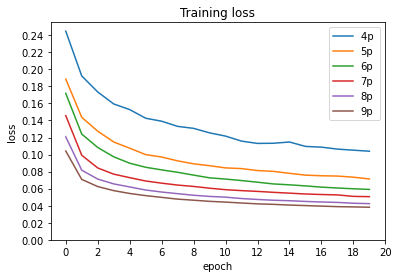

In [12]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.plot(history_6.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['4p ', '5p', '6p','7p','8p','9p'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Complete_Training_Loss_mae_8by4.png', dpi=1200)
plt.show()

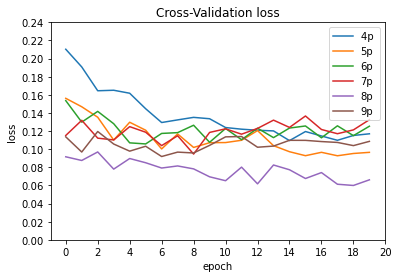

In [13]:
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.plot(history_5.history['val_loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Cross-Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['4p ', '5p', '6p','7p','8p','9p'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.0,0.5)
plt.xticks(np.arange(0.0, 21, 2))
plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Complete_Validation_Loss_mae_8by4.png', dpi=1200)
plt.show()